Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Use the same variable names as the ones written in the questions; otherwise, the tests will fail.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Rongyu Chu"

# Assignment: Traffic Flow
---

Consider the flow of traffic on a one-lane highway.
How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour.
We can also define a traffic density, the number of cars per unit length of highway, $\rho$, in cars per kilometer.
Finally, we can define a traffic flux, or the flow rate of cars, $F$,in cars per hour.

Now make a few assumptions about how traffic moves.

If $\rho$ approaches $0$, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_\text{max}$.

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_\text{max}$ and $V$ approaches $0$.

One possible equation to describe this behavior is

$$
\begin{equation}
    V = V_\text{max} \left( 1 - \frac{\rho}{\rho_\text{max}} \right)
\end{equation}
$$

If we describe the traffic flux, $F$ as $F = \rho V$, then

$$
\begin{equation}
    F = F \left( \rho \right) = V \left( \rho \right) \rho = V_\text{max} \rho \left( 1 - \frac{\rho}{\rho_{max}} \right)
\end{equation}
$$

Unsteady traffic flow can be modeled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$, the wave speed, equal to $\frac{\partial F}{\partial \rho}$:

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0
\end{equation}
$$

Applying the chain rule of calculus, this becomes

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

where $F$ is defined as above.

You will integrate the traffic flow equation using the modified Euler's method (also called midpoint method or Runge-Kutta second-order method) and discretize the first-order spatial derivative using a backward-difference quotient.

Examine a stretch of road $22$ kilometers long using the following conditions:

* $V_\text{max} = 80 \; \text{km/h}$
* $L = 22 \; \text{km}$
* $\rho_\text{max} = 250 \; \text{cars/km}$
* $nx = 101$ (number of points to discretize the road of length $L$)
* $\Delta t = 0.001 \; \text{hours}$

## Implement your solution
---

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
# Given
Vmax    = 80        # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size

In [5]:
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

## Assessment
---

Answer questions in this section.

Do not try to delete or modify the cells that are already present. For each question, make sure to provide your answer in the cell above the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)

In [6]:
# Import module to check your answers.
import mooc

### Part A

Use the following initial condition

$$
\begin{equation}
    \rho_0 = \rho \left(x, t = 0 \right) =
    \begin{cases}
        50 \quad \text{if} \; 2 \leq x \leq 4.2 \\
        10 \quad \text{otherwise}
    \end{cases}
    ,\quad \forall x \in \left[ 0, L \right]
\end{equation}
$$

and the following boundary condition

$$
\begin{equation}
    \rho \left( x=0, t \right) = \rho \left( x=L, t \right) = 10, \quad \forall t
\end{equation}
$$

to answer questions Q1, Q2, Q3, and Q4.

In [7]:
# Set initial conditions with 10.0 everywhere (for now).
rho0 = numpy.ones(nx)*10
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))

In [8]:
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()

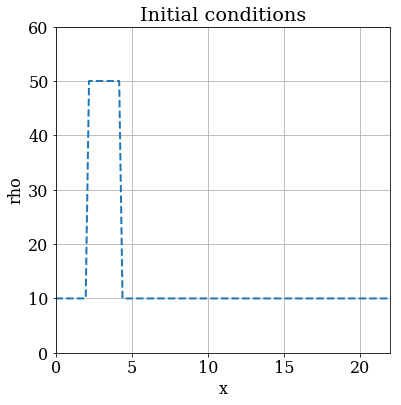

In [9]:
# Plot the initial conditions.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 60.0);

* Q1: What's the minimum initial velocity in meters per second?

Store your result in the variable `v0_min`; you can check your answer by calling the function `mooc.check('hw2_answer1', v0_min)`.

In [10]:
v0_min = Vmax*(1-max(rho0)/rhomax)/3.6
mooc.check('hw2_answer1', v0_min)

[hw2_answer1] Good job!


* Q2: What's the average velocity, in meters per second, along the road after $3$ minutes?

Store your result in the variable `v3_mean`; you can check your answer with the function `mooc.check('hw2_answer2', v3_mean)`.

In [11]:
nt  = 50

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)

v1 = Vmax*(1-rho/rhomax)
v3_mean = numpy.mean(v1)/3.6
mooc.check('hw2_answer2', v3_mean)

[hw2_answer2] Good job!


* Q3: What's the minimum velocity, in meters per second, after $6$ minutes?

Store your result in the variable `v6_min`; you can check your answer with the function `mooc.check('hw2_answer3', v6_min)`.

In [12]:
Vmax    = 80        # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 10.0 everywhere (for now).
rho0 = numpy.ones(nx)*10
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()
nt  = 100

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)

v2 = Vmax*(1-rho/rhomax)
v6_min = min(v2)/3.6
mooc.check('hw2_answer3', v6_min)

[hw2_answer3] Good job!


* Q4: What's the maximum car density, in cars per kilometer, along the road after 6 minutes?

Store you result in the variable `rho6_max`; you can check your answer with `mooc.check('hw2_answer4', rho6_max)`.

In [13]:
Vmax    = 80        # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 10.0 everywhere (for now).
rho0 = numpy.ones(nx)*10
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()
nt  = 100

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)


rho6_max = max(rho)
mooc.check('hw2_answer4', rho6_max)

[hw2_answer4] Good job!


### Part B

Now, set $V_\text{max} = 136 \; \text{km/hr}$ and redo the simulations using the following initial condition for the traffic density

$$
\begin{equation}
    \rho_0 = \rho \left(x, t = 0 \right) =
    \begin{cases}
        50 \quad \text{if} \; 2 \leq x \leq 4.2 \\
        20 \quad \text{otherwise}
    \end{cases}
    ,\quad \forall x \in \left[ 0, L \right]
\end{equation}
$$

and the following boundary condition

$$
\begin{equation}
    \rho \left( x=0, t \right) = \rho \left( x=L, t \right) = 20, \quad \forall t
\end{equation}
$$

Redo the simulations to answer questions Q5, Q6, Q7, and Q8.

* Q5: What's the minimum initial velocity in meters per second?

Store your result in the variable `v0_min2`; you can check your answer by calling the function `mooc.check('hw2_answer5', v0_min2)`.

In [14]:
Vmax    = 136       # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 20.0 everywhere (for now).
rho0 = numpy.ones(nx)*20
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

v0_min2 = Vmax*(1-max(rho0)/rhomax)/3.6
mooc.check('hw2_answer5', v0_min2)

[hw2_answer5] Good job!


* Q6: What's the average velocity, in meters per second, along the road after $3$ minutes?

Store your result in the variable `v3_mean2`; you can check your answer with the function `mooc.check('hw2_answer6', v3_mean2)`.

In [15]:
Vmax    = 136       # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 20.0 everywhere (for now).
rho0 = numpy.ones(nx)*20
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()
nt  = 50

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)

v1 = Vmax*(1-rho/rhomax)
v3_mean2 = numpy.mean(v1)/3.6
mooc.check('hw2_answer6', v3_mean2)

[hw2_answer6] Good job!


* Q7: What's the minimum velocity, in meters per second, after $6$ minutes?

Store your result in the variable `v6_min2`; you can check your answer with the function `mooc.check('hw2_answer7', v6_min2)`.

In [16]:
Vmax    = 136       # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 20.0 everywhere (for now).
rho0 = numpy.ones(nx)*20
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()
nt  = 100

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)

v2 = Vmax*(1-rho/rhomax)
v6_min2 = min(v2)/3.6
mooc.check('hw2_answer7', v6_min2)

[hw2_answer7] Good job!


* Q8: What's the average car density, in cars per kilometer, along the road after 6 minutes?

Store your result in the variable `rho6_mean2`; you can check your answer with the function `mooc.check('hw2_answer8', rho6_mean2)`.

In [17]:
Vmax    = 136       # km/h     Maximum Velocity
L       = 22        # km       Length of road
rhomax  = 250       # cars/km  Maximum density
nx      = 101       # /        Number of points to discretize the road of length  L
dt      = 0.001     # hr       Time grid size
dx    = L/(nx-1)  # spatial grid size

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)
# Set initial conditions with 20.0 everywhere (for now).
rho0 = numpy.ones(nx)*20
# Get a list of indices where 2.0 <= x <= 4.2.
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
# Set initial condition u = 50.0 where 2.0 <= x <= 4.2.
rho0[mask] = 50.0

rho  = rho0.copy()
F    = Vmax*rho*(1-rho/rhomax)
rho1 = rho.copy()
nt  = 100

for n in range (1,nt+1):
    rho1[1:-1] = rho[1:-1] - dt/(2*dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho1*(1-rho1/rhomax)
    rho[1:-1]  = rho[1:-1] - dt/(dx)*(F[1:-1]-F[:-2])
    F          = Vmax*rho*(1-rho/rhomax)

rho6_mean2 = numpy.mean(rho)
mooc.check('hw2_answer8', rho6_mean2)

[hw2_answer8] Good job!


---
###### The cell below loads the style of the notebook.

In [18]:
from IPython.core.display import HTML
css_file = './styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())